# Programming with Python
**SWC workshop: February 23-24, 2019**
#### This lesson is based on Software and Data Carpentry lessons:  
* http://swcarpentry.github.io/python-novice-inflammation/
* https://datacarpentry.org/python-ecology-lesson/

**Instructor: Joe Cloud**  

## Learning Objectives:
* Understand general structure of Python program
* Learn how to write user-defined functions
* Learn how to run python scripts from the command line
* Learn how to pass arguments to python scripts from the command line

Before we start, let's make a folder called `Python_programming` inside `SWC_spring2019` folder. Then copy `gapminder.txt` from `Data` folder to `Python_programming`. You can do that from `SWC_spring2019` folder using the terminal with Bash commands:   
`$ mkdir Python_programming`    
`$ cp Data/gapminder.txt Python_programming/`

### General structure of Python program  
Let's start by revisiting the script your wrote with Balan yesterday:

In [1]:
##This is  MeanGdpPlot.py script

#Import pandas and pylab
import pandas as pd
import matplotlib.pyplot as plt      
import pylab

#read data into python
my_file = pd.read_csv("gapminder.txt", sep = "\t")

#select information about Africa
Africa = my_file[my_file.continent == "Africa"]

#calculate the mean
Africa_Mean = Africa.iloc[:,5].mean()

#Do the same for Europe
Europe = my_file[my_file.continent == "Europe"]
Europe_Mean = Europe.iloc[:,5].mean()

# Create a List to store the values
continents = ["Africa","Europe"]
mean_gdp = [Africa_Mean, Europe_Mean]

# Set figure width to 10 and height to 8
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

#Plot the graph with Y axis label and Title
plt.bar(continents,mean_gdp,align='center')
plt.ylabel('Mean GDP/Capita')
plt.title('Mean GDP per Capita in Africa Vs Europe')
plt.savefig("Mean_GDP_Plot.png")

# For personal visualization:
plt.show()

<Figure size 1000x800 with 1 Axes>

In general python program can subdivided into following parts:

* Script description (brief summary about what the script does)
* Import statements ( tell us what libraries are used in the program)
* Loading data (tells us what data is used in the program)
* Data analysis (selecting parts of the data we are interested in and analyzing it (stats + visualization)

You might want to document these parts in your script to improve the readability of your program. Something like this?

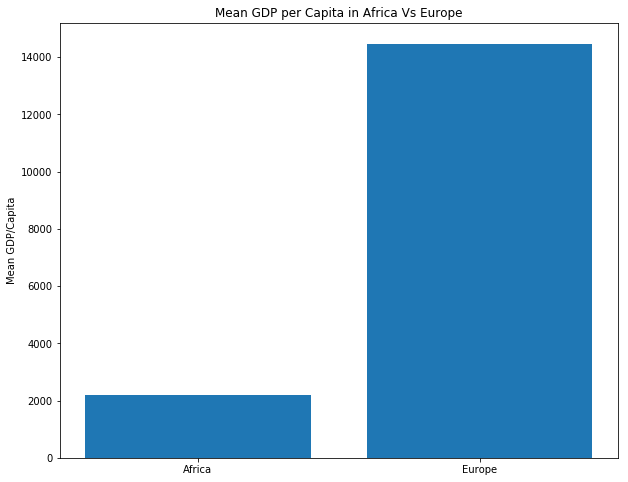

In [2]:
""" 
This is  MeanGdpPlot.py script
This script uses gapminder.txt to calculate and plot mean GDP per capita for African and European countries 
"""

####### import statements ##########
import pandas as pd
import matplotlib.pyplot as plt      
import pylab

####### reading data into Python ##########
my_file = pd.read_csv("gapminder.txt", sep = "\t")


####### data analysis #########
#select information about Africa
Africa = my_file[my_file.continent == "Africa"]

#calculate the mean
Africa_Mean = Africa.iloc[:,5].mean()

#Do the same for Europe
Europe = my_file[my_file.continent == "Europe"]
Europe_Mean = Europe.iloc[:,5].mean()

# Create a List to store the values
continents = ["Africa","Europe"]
mean_gdp = [Africa_Mean, Europe_Mean]

# Set figure width to 10 and height to 8
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

#Plot the graph with Y axis label and Title
plt.bar(continents,mean_gdp,align='center')
plt.ylabel('Mean GDP/Capita')
plt.title('Mean GDP per Capita in Africa Vs Europe')
plt.savefig("Mean_GDP_Plot.png")

### User-defined functions

There is a large improvement we can make to this script. Notice that we repeat some commands two times in this script. We select data about Africa, calculate mean gdp and then do the same for Europe. This way of writing a program introduces potential to make typos every time we type the command. It also makes script long and tedious to read - what if I wanted to calculate mean GDP for all 142 countries in our dataset? There is a better way to write a script that requires repeating the same commands with different inputs. If you find yourself rewriting the same command in your script, you should write a function to do the task. 
  
You have used function before: `pd.read_table()` is a function that reads file into python. This function takes a file as an argument and outputs a dataframe. This is a `built-in` function, it was written by python developers, and python knows what it is when you try to use it. You can think of `pd.read_table()` as a script name for a script that includes many lines of code that allows the user to load files into python. Or think of `pd.read_table()` as an alias to a multi-line script. Notice that we provide different file names to this function and it executed identical code to every file we provide. Think again about our program - it would be nice to have a function `getContinent()` so that when we use it, we could just provide the name of the continent we are interested in and get back the subset of the data frame with the information about the requested continent. There is no built-in function for that, but we can write one ourselves. When we write our own functions, they are called `user-defined` functions.  
  
Let's start with an example first, and we will return to `getContinent()` later.  

Remember, functions gather a sequence of operations into a whole, preserving it for ongoing use. Functions provide:

* a name we can remember and invoke it by
* relief from the need to remember the individual operations
* a defined set of inputs and expected outputs

Let's see how functions do that with an example.
Let's define a function that adds 10 to any number we give to it, call it `AddTen()`

In [3]:
def AddTen(number):
    answer = 10 + number
    return answer    

The definition opens with `def` keyword followed by the name of your new function(AddTen). The input into the function is provided in parentheses. The input to the function is also known as a parameter. In this case we have just one, but there could be more. The first line of function definition ends with `:`.   The body of the function — the statements that are executed when it runs — is indented below the definition line. Indentation is required in Python and 4 spaces are usually recommended. The body of the function is the set of statements that are executed when the function is used (or called). The body concludes with a return keyword followed by the return value.

When we call the function, the values we pass to it are assigned to those variables so that we can use them inside the function. The last line within the function is what Python will evaluate as a returning value. For example, let’s try running our function. Calling our own function is no different from calling any other function:

In [4]:
AddTen(5)

15

Here number variable gets the value of 5, and commands inside the functions are executed. The output of the functions is specified by `return` statement

**Challenge 1**

Write a function called `fence` that takes two parameters called `original` and `wrapper` and returns a new string that has
the wrapper character at the beginning and end of the original.  
Hint: to concatinate strings, use `+` operator
Example of function call:  
`fence('name', '---')`  
Expected output:  
`---name---`  


**Solution to challenge 1**

In [5]:
def fence(original, wrapper):  
    new_string=wrapper + original + wrapper
    return new_string

In [6]:
fence('Joe','---')

'---Joe---'

Now let's get back to our script analyzing gapminder.txt and see how we can improve it with user-defined functions.
What tasks could we wrap up in a function here?

What repetitive tasks are we performing?

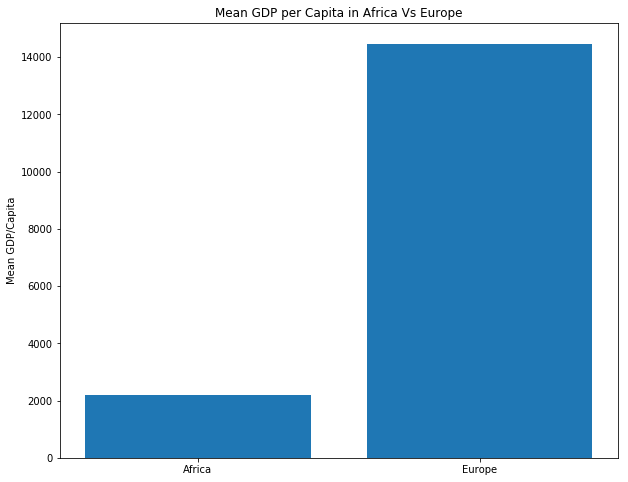

In [7]:
""" 
This is  MeanGdpPlot.py script
This script uses gapminder.txt to calculate and plot mean GDP per capita for African and European countries 
"""

####### import statements ##########
import pandas as pd
import matplotlib.pyplot as plt      
import pylab

####### reading data into Python ##########
my_file = pd.read_csv("gapminder.txt", sep = "\t")


####### data analysis #########
#select information about Africa
Africa = my_file[my_file.continent == "Africa"]

#calculate the mean
Africa_Mean = Africa.iloc[:,5].mean()

#Do the same for Europe
Europe = my_file[my_file.continent == "Europe"]
Europe_Mean = Europe.iloc[:,5].mean()

# Create a List to store the values
continents = ["Africa","Europe"]
mean_gdp = [Africa_Mean, Europe_Mean]

# Set figure width to 10 and height to 8
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

#Plot the graph with Y axis label and Title
plt.bar(continents,mean_gdp,align='center')
plt.ylabel('Mean GDP/Capita')
plt.title('Mean GDP per Capita in Africa Vs Europe')
plt.savefig("Mean_GDP_Plot.png")

We are using `my_file[my_file.continent == "Africa"]` twice - for Africa and Europe.  This is a long line, you really do not want to type it over and over if you need information about more than one contient.  So how can we write `getContinent()` function that would take a data frame and a name of a continent as inputs and output the data frame that ONLY contains information about that continent? 

In [8]:
def getContinent(continent, df):
    my_continent = df[df.continent == continent]
    return my_continent

# call getContinent() function with `Africa`
Africa=getContinent('Africa', my_file)
print(Africa.head())

# call getContinent() function with `Europe`
Europe=getContinent('Europe', my_file)
print(Europe.head())

    country continent  year  lifeExp       pop    gdpPercap
24  Algeria    Africa  1952   43.077   9279525  2449.008185
25  Algeria    Africa  1957   45.685  10270856  3013.976023
26  Algeria    Africa  1962   48.303  11000948  2550.816880
27  Algeria    Africa  1967   51.407  12760499  3246.991771
28  Algeria    Africa  1972   54.518  14760787  4182.663766
    country continent  year  lifeExp      pop    gdpPercap
12  Albania    Europe  1952    55.23  1282697  1601.056136
13  Albania    Europe  1957    59.28  1476505  1942.284244
14  Albania    Europe  1962    64.82  1728137  2312.888958
15  Albania    Europe  1967    66.22  1984060  2760.196931
16  Albania    Europe  1972    67.69  2263554  3313.422188


Min advantage of functions: we define/write function one time, but use it multiple times.

How else can the code be simplified with user-defined functions?

In [9]:
# get mean of any column from data frame
def getMean(column_name, df):
    return df.loc[:,column_name].mean()

And

In [10]:
def plot_bar(continents_list, meanData_list, y_label, title, figure_name):
    # Set figure width to 10 and height to 8
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 8
    plt.rcParams["figure.figsize"] = fig_size

    #Plot the graph with Y axis label and Title
    plt.bar(continents_list,meanData_list,align='center')
    plt.ylabel(y_label)
    plt.title(title)
    plt.savefig(figure_name)

Some might notice that the matplotlib params will not change every time the function is called. 
So it may be better to place it outside the function.

With these changes, our script would look like this:

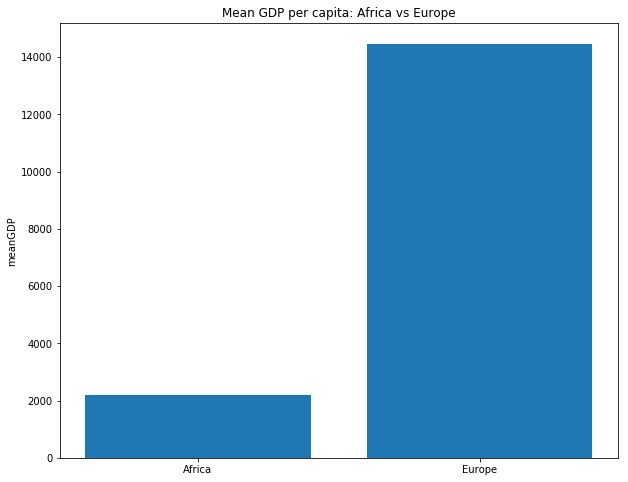

In [11]:
""" 
This is  MeanPlot.py script
This script uses gapminder.txt to calculate and plot mean GDP per capita for African and European countries 
"""

####### import statements ##########
import pandas as pd
import matplotlib.pyplot as plt      
import pylab

####### user-defined functions #########
def getContinent(continent, df):
    my_continent = df[df.continent == continent]
    return my_continent

def getMean(column_name, df):
    return df.loc[:,column_name].mean()

def plot_bar(continents_list, meanData_list, y_label, title, figure_name):
    # Set figure width to 10 and height to 8
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 8
    plt.rcParams["figure.figsize"] = fig_size

    #Plot the graph with Y axis label and Title
    plt.bar(continents_list,meanData_list,align='center')
    plt.ylabel(y_label)
    plt.title(title)
    plt.savefig(figure_name)

####### end user-defined functions #########


####### reading data into Python ##########
my_file = pd.read_csv("gapminder.txt", sep = "\t")


####### data analysis #########
#select information about Africa
Africa=getContinent('Africa', my_file)

#calculate the mean
Africa_mean=getMean('gdpPercap', Africa)

#Do the same for Europe
Europe = getContinent('Europe', my_file)
Europe_mean=getMean('gdpPercap', Europe)

# Create a List to store the values
continents = ["Africa","Europe"]
means = [Africa_Mean, Europe_Mean]

# plot
plot_bar(continents, means, 'meanGDP', 'Mean GDP per capita: Africa vs Europe', 'Mean_Gdp.png')

We have an improved script here, but we are still repeting `getContinent()` and `getMean()` functions twice.  

**Challenge 2**  
Write a function called `getMeanPerContinent()` that will take `continent`,`column_name` and `df` parameters and output the mean of a user-specified column for user-specified continent?  

**Solution** to Challenge 2:  
Option 1:

In [12]:
def getMeanPerContinent(continent, column_name, df):
    my_continent = df[df.continent == continent]
    continent_mean=my_continent.loc[:,column_name].mean()
    return my_mean

Option 2:  

In [13]:
def getMeanPerContinent(continent, column_name, df):
    my_continent=getContinent(continent, df)
    continent_mean=getMean(column_name, my_continent)
    return continent_mean

Which one is better? Why?  
The second option reuses the functions we already defined and if we need to use just `getContinent()` or `getMean()` functions separetely, we still can do it. It is better to write small functions that do specific tasks and then combine them to perform more complicated tasks.  
This is our first taste of how larger programs are built: we define basic operations, then combine them in ever-large chunks to get the effect we want. Real-life functions will usually be larger than the ones shown here — typically half a dozen to a few dozen lines — but they shouldn’t ever be much longer than that, or the next person who reads it won’t be able to understand what’s going on.

With this improvement, our script will look like this:

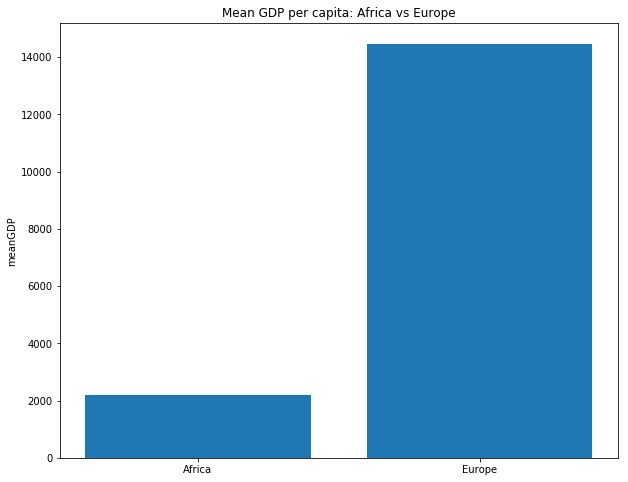

In [14]:
""" 
This is  MeanPlot.py script
This script uses gapminder.txt to calculate and plot mean GDP per capita for African and European countries 
"""

####### import statements ##########
import pandas as pd
import matplotlib.pyplot as plt      
import pylab

####### user-defined functions #########
def getContinent(continent, df):
    my_continent = df[df.continent == continent]
    return my_continent

def getMean(column_name, df):
    return df.loc[:,column_name].mean()

def getMeanPerContinent(continent, column_name, df):
    my_continent=getContinent(continent, df)
    continent_mean=getMean(column_name, my_continent)
    return continent_mean

def plot_bar(continents_list, meanData_list, y_label, title, figure_name):
    # Set figure width to 10 and height to 8
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 8
    plt.rcParams["figure.figsize"] = fig_size

    #Plot the graph with Y axis label and Title
    plt.bar(continents_list,meanData_list,align='center')
    plt.ylabel(y_label)
    plt.title(title)
    plt.savefig(figure_name)

####### end user-defined functions #########


####### reading data into Python ##########
my_file = pd.read_csv("gapminder.txt", sep = "\t")


####### data analysis #########

#calculate means for Africa and Europe
Africa_Mean = getMeanPerContinent('Africa','gdpPercap', my_file)
Europe_Mean = getMeanPerContinent('Europe','gdpPercap', my_file)

# Create a List to store the values
continents = ["Africa","Europe"]
means = [Africa_Mean, Europe_Mean]

# plot
plot_bar(continents, means, 'meanGDP', 'Mean GDP per capita: Africa vs Europe', 'Mean_Gdp.png')

Notice, we are moving as much code as possible into functions. This improves readability and makes our program more modular.
The data analysis part of the script is easy to read, if we really want to know means per continent were calculated, we can look it up in function definintion

### Running Python scripts from the command line

Jupyter notebook is helpful for writing scripts for its interactive feature where you can check that every command works as intended. But at the end, python scripts are just text files with a series of commands written in the order of execution. We can save our final script as `MeanPlot.py` into our `Python_programming` directory. Now you can open terminal, navigate to `Python_programming`  and run this script from the command line:  
`$ python MeanPlot.py`

### Passing command-line arguments to python scripts

Remember how you passed command-line arguments to Bash script yesterday?   
`$ ./MyScript.sh inputFile`  
In Bash, there are special variables, `$1`,`$2`, ... inside shell script. The values assigned to these variables are supplied at the command line.  
In Python, command-line arguments are stored in a special list, `sys.argv`. To use this list we need to import `sys` library.  
Let's modify MeanPlot.py to supply input file at the command line. Call it `MeanPLot2.py`

In [ ]:
""" 
This is  MeanPlot2.py script
This script uses gapminder.txt to calculate and plot mean GDP per capita for African and European countries 
"""

####### import statements ##########
import pandas as pd
import matplotlib.pyplot as plt      
import pylab
import sys

####### user-defined functions #########
def getContinent(continent, df):
    my_continent = df[df.continent == continent]
    return my_continent

def getMean(column_name, df):
    return df.loc[:,column_name].mean()

def getMeanPerContinent(continent, column_name, df):
    my_continent=getContinent(continent, df)
    continent_mean=getMean(column_name, my_continent)
    return continent_mean

def plot_bar(continents_list, meanData_list, y_label, title, figure_name):
    # Set figure width to 10 and height to 8
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 8
    plt.rcParams["figure.figsize"] = fig_size

    #Plot the graph with Y axis label and Title
    plt.bar(continents_list,meanData_list,align='center')
    plt.ylabel(y_label)
    plt.title(title)
    plt.savefig(figure_name)
    
####### end user-defined functions #########


####### reading data into Python ##########
inFile = sys.argv[1]
my_file = pd.read_table(inFile)


####### data analysis #########

#calculate means for Africa and Europe
Africa_Mean = getMeanPerContinent('Africa','gdpPercap', my_file)
Europe_Mean = getMeanPerContinent('Europe','gdpPercap', my_file)

# Create a List to store the values
continents = ["Africa","Europe"]
means = [Africa_Mean, Europe_Mean]

# plot
plot_bar(continents, means, 'meanGDP', 'Mean GDP per capita: Africa vs Europe', 'Mean_Gdp.png')

To run this script from the command line, save as MeanPlot2.py, open terminal and type:  
`$ python MeanPlot2.py gapminder.txt`

**Challenge 3**  
Modify `MeanPlot2.py` to plot mean life expectancy for 3 continents of your choice. Save as `MeanPlot3.py`  

  
**Solution to Challenge 3**

In [ ]:
""" 
This is  MeanPlot2.py script
This script uses gapminder.txt to calculate and plot mean GDP per capita for African and European countries 
"""

####### import statements ##########
import pandas as pd
import matplotlib.pyplot as plt      
import pylab
import sys

####### user-defined functions #########
def getContinent(continent, df):
    my_continent = df[df.continent == continent]
    return my_continent

def getMean(column_name, df):
    return df.loc[:,column_name].mean()

def getMeanPerContinent(continent, column_name, df):
    my_continent=getContinent(continent, df)
    continent_mean=getMean(column_name, my_continent)
    return continent_mean

def plot_bar(continents_list, meanData_list, y_label, title, figure_name):
    # Set figure width to 10 and height to 8
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 8
    plt.rcParams["figure.figsize"] = fig_size

    #Plot the graph with Y axis label and Title
    plt.bar(continents_list,meanData_list,align='center')
    plt.ylabel(y_label)
    plt.title(title)
    plt.savefig(figure_name)
    
####### end user-defined functions #########


####### reading data into Python ##########
inFile = sys.argv[1]
my_file = pd.read_table(inFile)


####### data analysis #########

#calculate means for Africa and Europe
Africa_Mean = getMeanPerContinent('Africa','gdpPercap', my_file)
Europe_Mean = getMeanPerContinent('Europe','gdpPercap', my_file)
Asia_Mean = getMeanPerContinent('Asia','gdpPercap', my_file)

# Create a List to store the values
continents = ["Africa","Europe", "Asia"]
means = [Africa_Mean, Europe_Mean, Asia_Mean]

# plot
plot_bar(continents, means, 'meanGDP', 'Mean GDP per capita: Africa vs Europe vs Asia', 'Mean_Gdp.png')

**Challenge 3  OLD - DON'T USE**

Modify `MeanPlot2.py` to plot mean life expectancy for 3 countries of your choice. Save as `MeanPlot3.py`  
Remember, you can view the list of available countries with `my_file['country'].unique()` command in Jupyter Notebook
or from the terminal like this: `cut -f1 gapminder.txt|sort|uniq`  
  
**Solution to Challenge 3**

In [ ]:
""" 
This is  MeanPlot3.py script
This script uses gapminder.txt to calculate and plot mean life expectancy for Norway, Uruguay and Mexico
"""

####### import statements ##########
import pandas as pd
import matplotlib.pyplot as plt      
import pylab
import sys

####### user-defined functions #########
def getCountry(country, df):
    my_country = df[df.country == country]
    return my_country

def getMean(column_name, df):
    return df.loc[:,column_name].mean()

def getMeanPerCountry(country, column_name, df):
    my_country=getCountry(country, df)
    country_mean=getMean(column_name, my_country)
    return country_mean

def plot_bar(country_list, meanData_list, y_label, title, figure_name):
    # Set figure width to 10 and height to 8
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 8
    plt.rcParams["figure.figsize"] = fig_size

    #Plot the graph with Y axis label and Title
    plt.bar(country_list,meanData_list,align='center')
    plt.ylabel(y_label)
    plt.title(title)
    plt.savefig(figure_name)
    
####### end user-defined functions #########


####### reading data into Python ##########
inFile = sys.argv[1]
my_file = pd.read_table(inFile)


####### data analysis #########

#calculate means for Africa and Europe
Norway_Mean = getMeanPerCountry('Norway','lifeExp', my_file)
Urugay_Mean = getMeanPerCountry('Uruguay','lifeExp', my_file)
Mexico_Mean = getMeanPerCountry('Mexico','lifeExp', my_file)

# Create a List to store the values
countries = ["Norway","Uruguay","Mexico"]
means = [Norway_Mean, Urugay_Mean, Mexico_Mean]

# plot
plot_bar(countries, means, 'mean Life expectancy', 'Mean Life expectancy', 'Mean_lifeExp.png')

Run this: `python MeanPlot3.py gapminder.txt`

Given extra time: Discuss `__main__`

## Resources:
https://www.tutorialspoint.com/python/python_functions.htm  
https://realpython.com/documenting-python-code/